In [1]:
import json
import glob
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
import sys
sys.path.append('./../../Figures/')
import makeCorner

Load `.json` result files which contains
1. direct output from `emcee` interference, without any processing
2. post-processed output from `emcee` inference

and make dict containing info for all populations under the given model

In [12]:
# For loading files
model = 'betaPlusDoubleGaussian'
pops = ['1', '2', '3']
names = ['noRedshift', 'noRedshift_fixedExtrinsic', 'justSpins', 'justSpinsBilbyFixedExtrinsic']


# Make Dict
data_dict = {}

# Cycle through the different populations and no. of events
for pop in pops: 
    data_pop = {}
    for name in names: 
        
        print(pop, name)
        
        fname = f"{model}_pop{pop}_100events_{name}"
        
        with open(f'{model}/{fname}.json', 'r') as f:
            data = json.load(f)
            
        data_pop[name] = data    
            
    data_dict['pop '+pop] = data_pop

1 noRedshift
1 noRedshift_fixedExtrinsic
1 justSpins
1 justSpinsBilbyFixedExtrinsic
2 noRedshift
2 noRedshift_fixedExtrinsic
2 justSpins
2 justSpinsBilbyFixedExtrinsic
3 noRedshift
3 noRedshift_fixedExtrinsic
3 justSpins
3 justSpinsBilbyFixedExtrinsic


In [22]:
# Names of populations from paper for plotting below
population_labels_dict = {
    'pop 1':r'$\mathrm{\textsc{HighSpinPrecessing}}$', 
    'pop 2':r'$\mathrm{\textsc{MediumSpin}}$', 
    'pop 3':r'$\mathrm{\textsc{LowSpinAligned}}$'
}

# Colors corresponding to different runs
colors_dict = {
    'noRedshift':'#007f4e', 
    'noRedshift_fixedExtrinsic':'#175b91',
    'justSpins':'#f4d35e', 
    'justSpinsBilbyFixedExtrinsic':'#f95738'
}

# For plot legends
labels_dict = {
    'noRedshift':'100 events, 15D', 
    'noRedshift_fixedExtrinsic':'100 events, 8D',
    'justSpins':'100 events, 15D, no mass', 
    'justSpinsBilbyFixedExtrinsic':'100 events, 8D, no mass',
}

The contents of the file for each population and number of events are the following:

| Parameter (dict key) | Description |
| :-------- | :---------- |
| `mu_chi` | Mean of the spin magnitude beta distribution|
| `sigma_chi` | Standard deviation of the spin magnitude beta distribution |
| `mu1_chi` | Mean of gaussian 1 for the $\cos\theta$ distribution |
| `sigma1_cost` |  Standard deviation of gaussian 1 for the $\cos\theta$ distribution |
| `mu2_chi` | Mean of gaussian 2 for the $\cos\theta$ distribution |
| `sigma2_cost` |  Standard deviation of gaussian 2 for the $\cos\theta$ distribution |
| `MF_cost` |  Fraction in gaussian 1 for the $\cos\theta$ distribution |

Next, plot our various chains to inspect convergence:

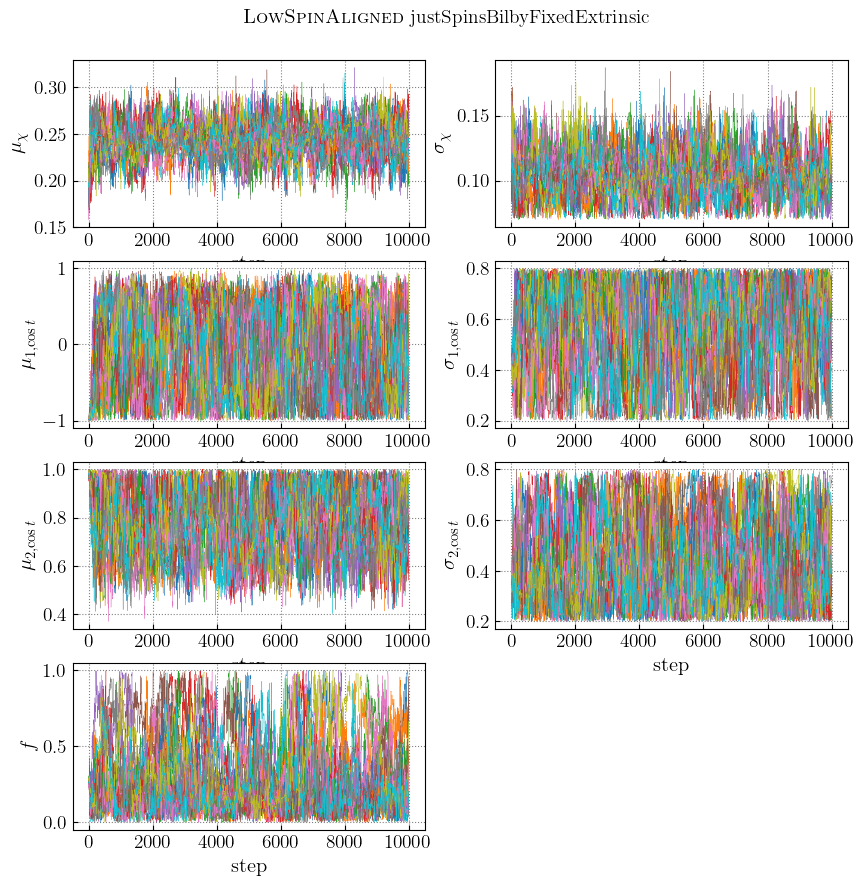

In [14]:
# Select which pop and no. events you want to look at
pop_key = 'pop 3'
name_key = 'noRedshift_fixedExtrinsic'
data = data_dict[pop_key][name_key]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

# mean of chi
for chain in data['mu_chi']['unprocessed']:
    axes[0][0].plot(chain, lw=0.25)
axes[0][0].set_ylabel(r'$\mu_\chi$', fontsize=15)

# sigma of chi
for chain in data['sigma_chi']['unprocessed']:
    axes[0][1].plot(chain, lw=0.25)
axes[0][1].set_ylabel(r'$\sigma_\chi$', fontsize=15)

# mean of gaussian 1 cos(theta)
for chain in data['mu1_cost']['unprocessed']:
    axes[1][0].plot(chain, lw=0.25)
axes[1][0].set_ylabel(r'$\mu_{1, \cos t}$', fontsize=15)

# sigma of gaussian 1 cos(theta)
for chain in data['sigma1_cost']['unprocessed']:
    axes[1][1].plot(chain, lw=0.25)
axes[1][1].set_ylabel(r'$\sigma_{1, \cos t}$', fontsize=15)

# mean of gaussian 2 cos(theta)
for chain in data['mu2_cost']['unprocessed']:
    axes[2][0].plot(chain, lw=0.25)
axes[2][0].set_ylabel(r'$\mu_{2, \cos t}$', fontsize=15)

# sigma of gaussian 2 cos(theta)
for chain in data['sigma2_cost']['unprocessed']:
    axes[2][1].plot(chain, lw=0.25)
axes[2][1].set_ylabel(r'$\sigma_{2, \cos t}$', fontsize=15)

# mixing fraction cos(theta)
for chain in data['MF_cost']['unprocessed']:
    axes[3][0].plot(chain, lw=0.25)
axes[3][0].set_ylabel(r'$f$', fontsize=15)

axes[3][1].set_visible(False)

for ax in axes: 
    for a in ax:
        a.set_xlabel('step', fontsize=15)       
                
plt.suptitle(population_labels_dict[pop_key] + ' ' + name, y=0.93, fontsize=14)

plt.show()

Let's make a corner plot showing posteriors on our each set of parameters:

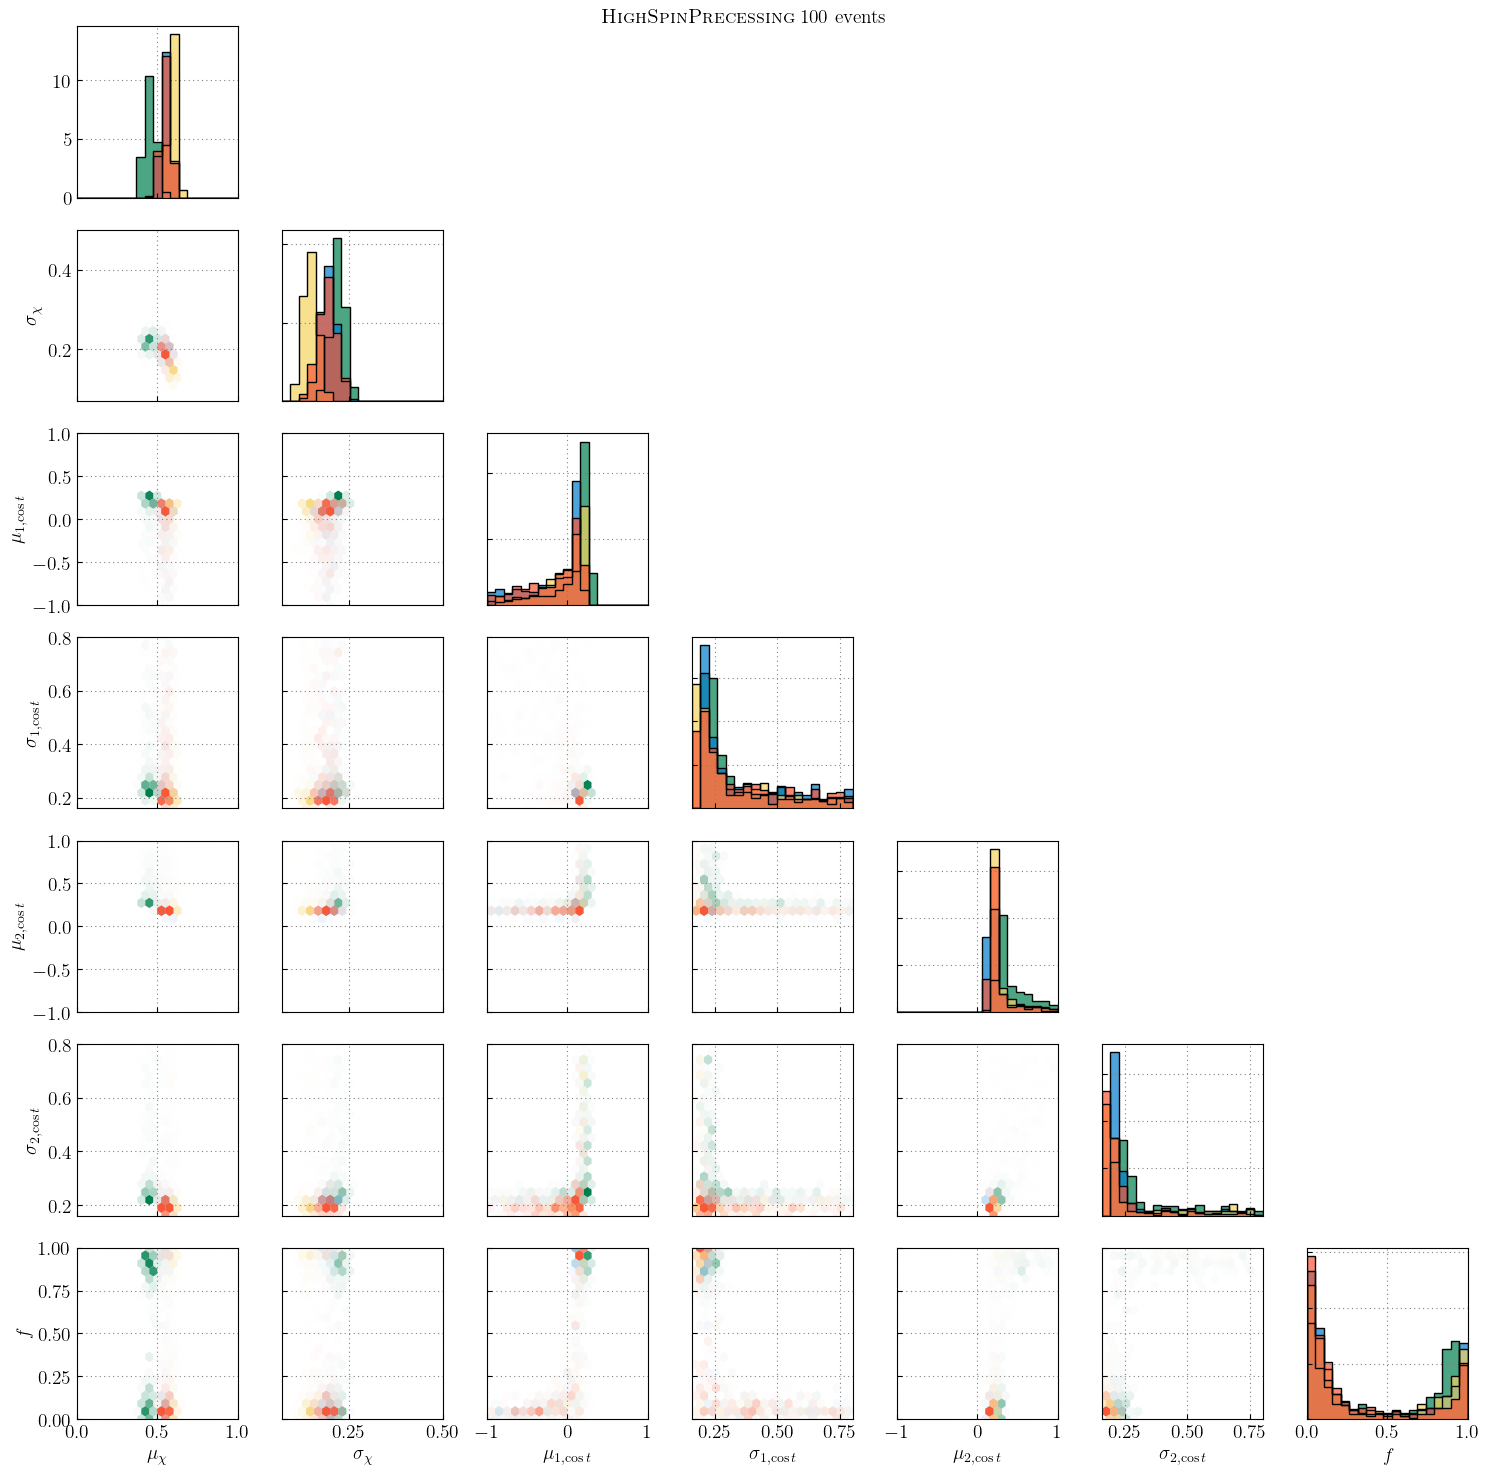

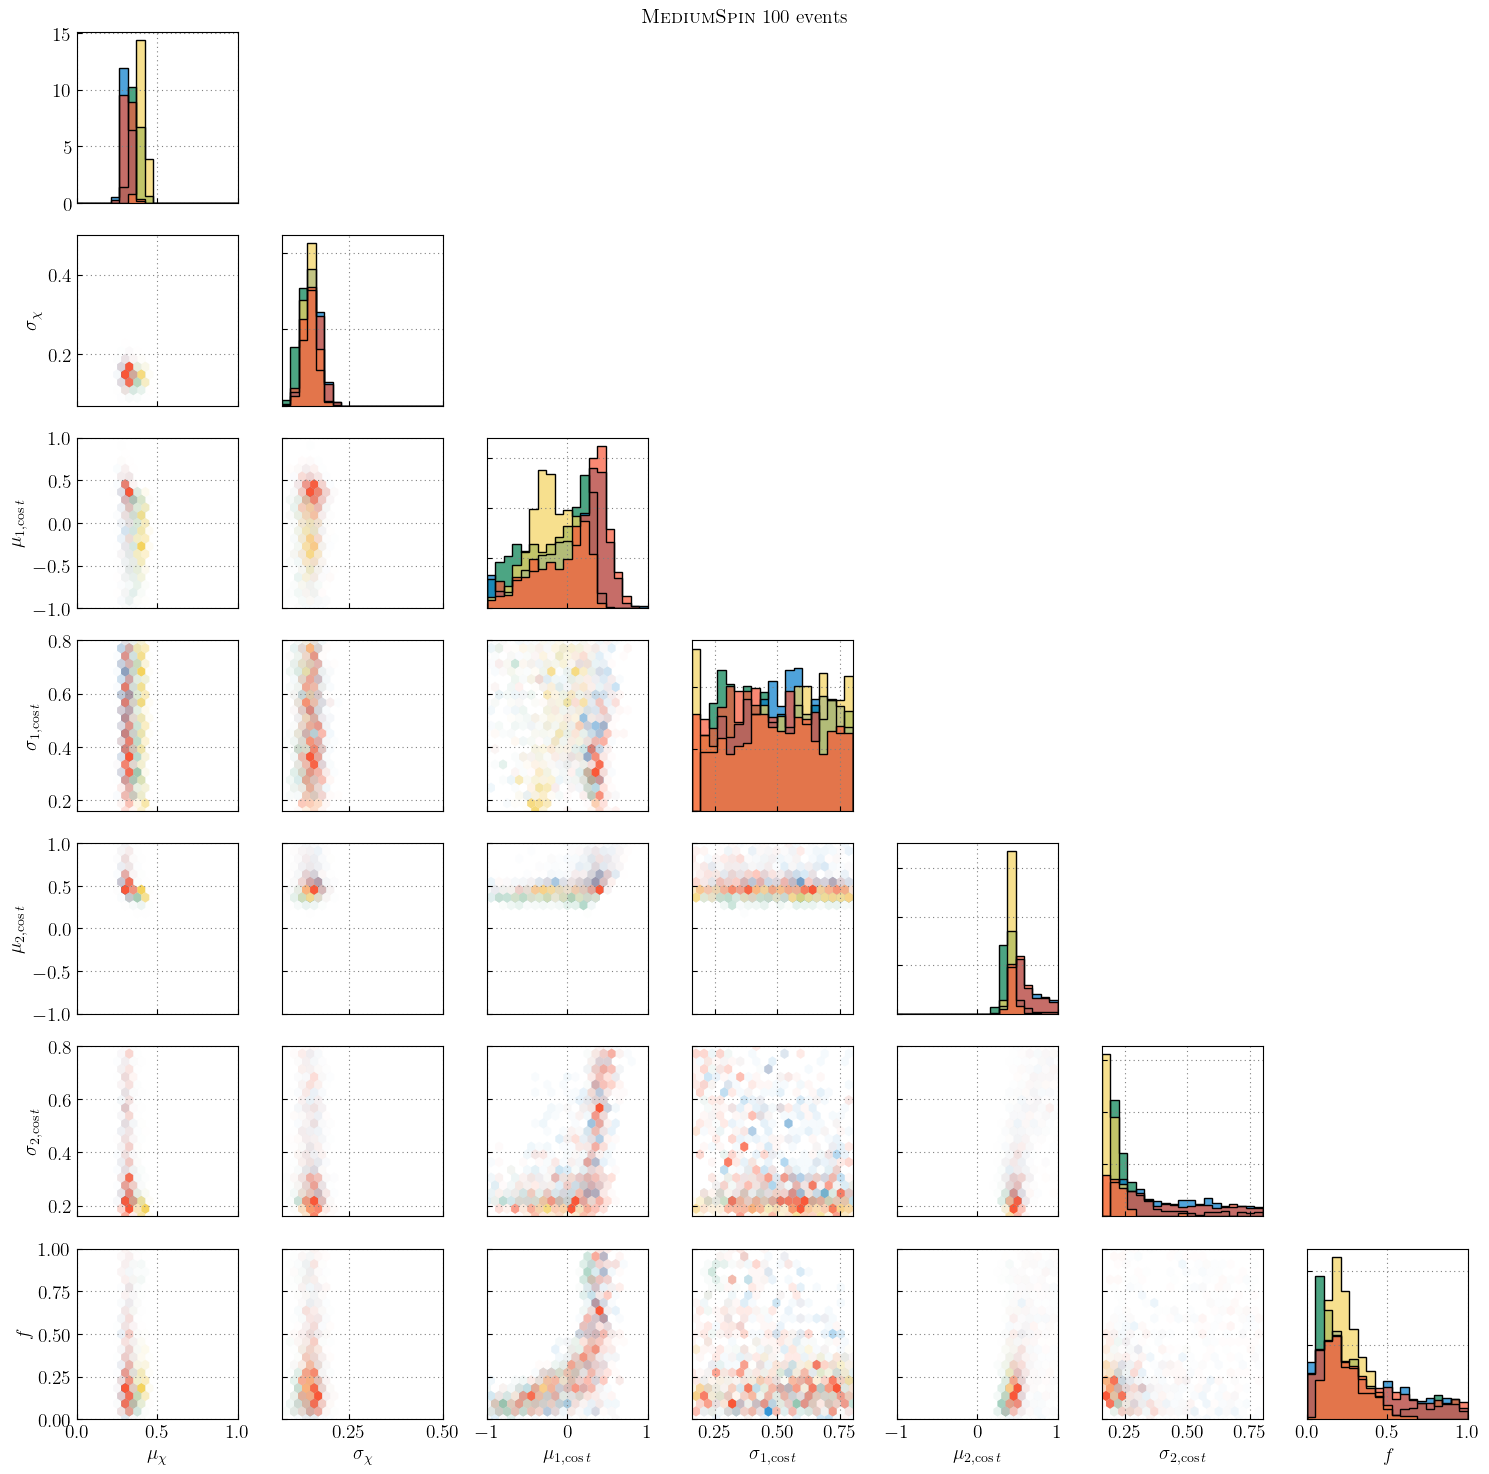

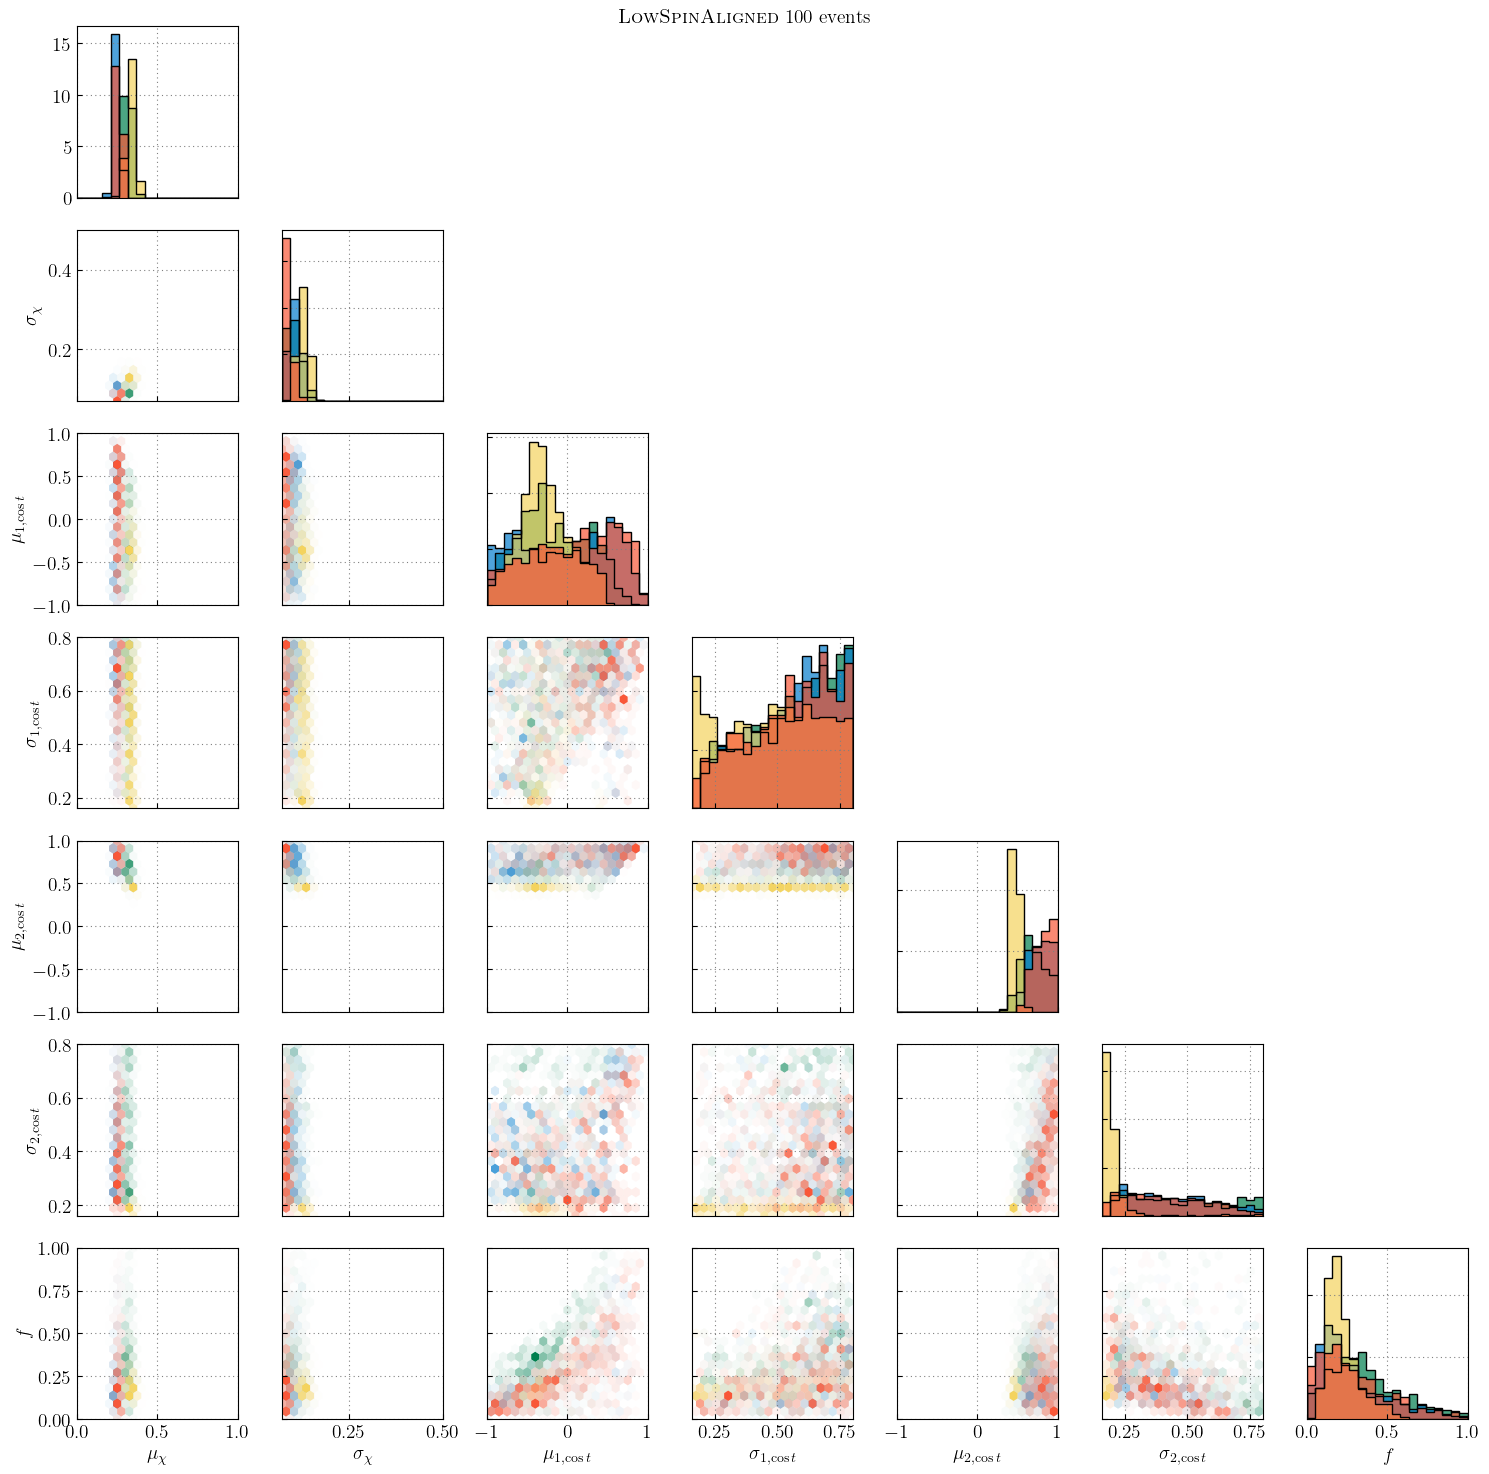

In [15]:
import importlib
importlib.reload(makeCorner)

for pop in pops: 
    
    # Fetch data
    pop_key = 'pop '+pop
    data = data_dict[pop_key]

    # Plot
    fig = plt.figure(figsize=(15,15))

    toPlot = {
        "mu_chi":{
            "data":{name:{'posterior':data[name]['mu_chi']['processed'], 'color':colors_dict[name]} for name in names},
            "plot_bounds":(0,1), "label":r"$\mu_\chi$"
        },
        "sigma_chi":{
            "data":{name:{'posterior':data[name]['sigma_chi']['processed'], 'color':colors_dict[name]} for name in names},
            "plot_bounds":(0.07,0.5), "label":r"$\sigma_\chi$" 
        },
        "mu1_cost":{
            "data":{name:{'posterior':data[name]['mu1_cost']['processed'], 'color':colors_dict[name]} for name in names},
            "plot_bounds":(-1,1), "label":r"$\mu_{1, \cos t}$" 
        },
        "sigma1_cost":{
            "data":{name:{'posterior':data[name]['sigma1_cost']['processed'], 'color':colors_dict[name]} for name in names},
            "plot_bounds":(0.16,0.8), "label":r"$\sigma_{1, \cos t}$" 
        }, 
         "mu2_cost":{
            "data":{name:{'posterior':data[name]['mu2_cost']['processed'], 'color':colors_dict[name]} for name in names},
            "plot_bounds":(-1,1), "label":r"$\mu_{2, \cos t}$" 
        },
        "sigma2_cost":{
            "data":{name:{'posterior':data[name]['sigma2_cost']['processed'], 'color':colors_dict[name]} for name in names},
            "plot_bounds":(0.16,0.8), "label":r"$\sigma_{2, \cos t}$" 
        }, 
         "MF_cost":{
            "data":{name:{'posterior':data[name]['MF_cost']['processed'], 'color':colors_dict[name]} for name in names},
            "plot_bounds":(0,1), "label":r"$f$" 
         }
    }

    makeCorner.plot_corner(fig,toPlot)
    plt.suptitle(population_labels_dict[pop_key]+' 100 events', fontsize=14)
    plt.tight_layout()
    plt.show()

Finally, let's make a "trace plot" showing the set of $\chi$ and $\cos \theta$ distributions corresponding to the above samples:

In [16]:
sys.path.append('./../../Code/PopulationInference')
from posterior_helper_functions import mu_sigma2_to_a_b, calculate_betaDistribution, calculate_Double_Gaussian

In [17]:
# True mu_chi, sigma_chi, mu1_cost, sigma1_cost, mu2_cost, sigma2_cost, f, Bq:
hyperparams = { 
    '1':[0.55, 0.26, 0.19, 0.18, 0.42, 0.75, 0.55],  
    '2':[0.32, 0.16, 0.33, 0.64, 0.59, 0.40, 0.36],
    '3':[0.19, 0.12, -0.98, 0.44, 0.98, 0.31, 0.26]
}

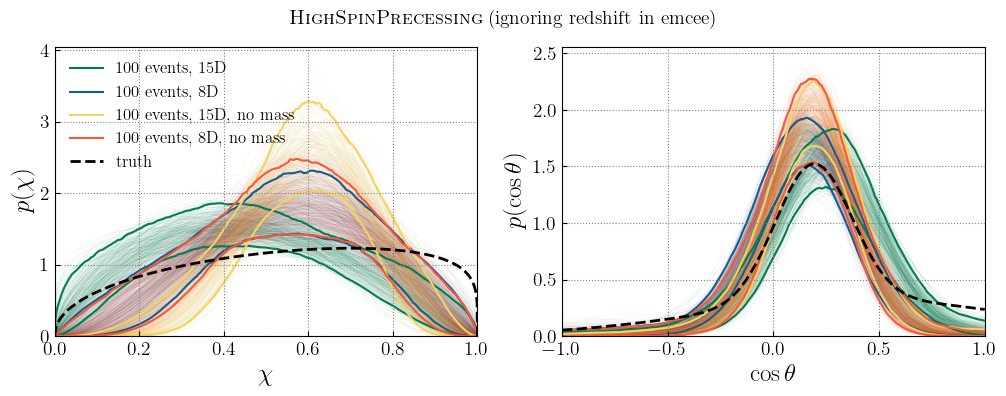

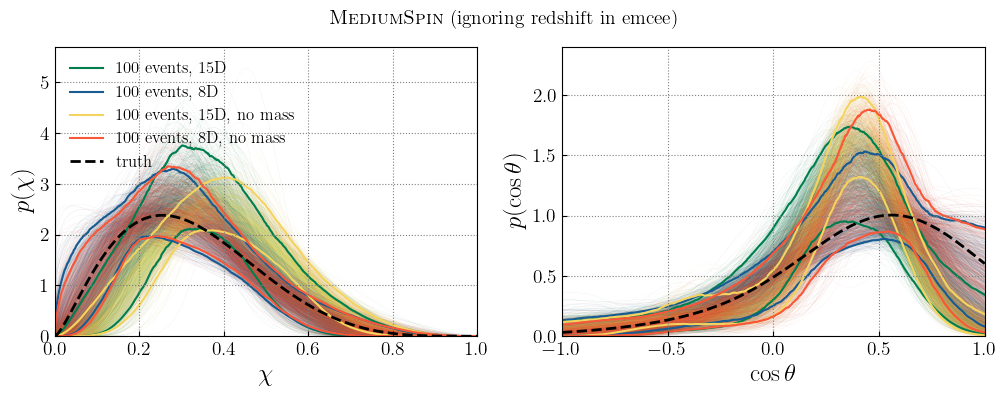

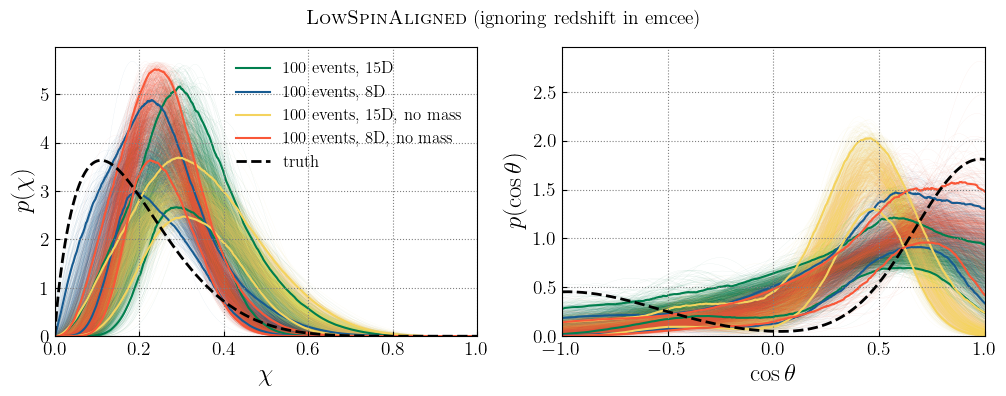

In [23]:
# Define a grid of effective spins
chi_grid = np.linspace(0,1,1000)
cost_grid = np.linspace(-1,1,1000)

# Choose a number of traces to draw
nTracesMax = 1000

for pop in pops: 
    
    # Set up fig and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3.75))
    
    for name in names: 
            
        # Fetch data
        pop_key = 'pop '+pop
        data = data_dict[pop_key][name]
        
        # Instantiate an array to hold a collection of traces
        nTraces = min(nTracesMax, len(data['mu_chi']['processed']))
        p_chi = np.zeros((nTraces,chi_grid.size))
        p_cost = np.zeros((nTraces,cost_grid.size))

        # For a random set of posterior samples, compute and store the corresponding probability densities across our grid
        random_indices = np.random.choice(np.arange(len(data['mu_chi']['processed'])), size=nTraces,replace=False)
        for i,ind in enumerate(random_indices):

            mu_chi = data['mu_chi']['processed'][ind]
            sigma_chi = data['sigma_chi']['processed'][ind]
            mu1_cost = data['mu1_cost']['processed'][ind]
            sigma1_cost = data['sigma1_cost']['processed'][ind]
            mu2_cost = data['mu2_cost']['processed'][ind]
            sigma2_cost = data['sigma2_cost']['processed'][ind]
            MF_cost = data['MF_cost']['processed'][ind]

            # calculate beta distribution for chi
            a,b = mu_sigma2_to_a_b(mu_chi, sigma_chi**2)
            p_chi[i,:] = calculate_betaDistribution(chi_grid, a, b)

            # and gaussian distribution for cos(theta)
            p_cost[i,:] = calculate_Double_Gaussian(cost_grid, mu1_cost, sigma1_cost, mu2_cost, sigma2_cost, MF_cost, -1, 1)       

        # Plot individual traces
        axes[0].plot(chi_grid, p_chi.T,color=colors_dict[name], lw=0.15, alpha=0.15, zorder=0)
        axes[1].plot(cost_grid, p_cost.T,color=colors_dict[name], lw=0.15, alpha=0.15, zorder=0)

        # Also plot 5% and 95% credible bounds
        axes[0].plot(chi_grid, np.quantile(p_chi,0.05,axis=0), color=colors_dict[name], zorder=1, label=labels_dict[name])
        axes[0].plot(chi_grid, np.quantile(p_chi,0.95,axis=0), color=colors_dict[name], zorder=1)
        axes[1].plot(cost_grid, np.quantile(p_cost,0.05,axis=0), color=colors_dict[name], zorder=1)
        axes[1].plot(cost_grid, np.quantile(p_cost,0.95,axis=0), color=colors_dict[name], zorder=1)


    # Plot true distributions distributions 
    mu_chi_true = hyperparams[pop][0]
    sigma_chi_true = hyperparams[pop][1]
    a_true, b_true = mu_sigma2_to_a_b(mu_chi_true, sigma_chi_true**2)
    p_chi_true = calculate_betaDistribution(chi_grid, a_true, b_true)
    mu1_cost_true = hyperparams[pop][2]
    sigma1_cost_true = hyperparams[pop][3]
    mu2_cost_true = hyperparams[pop][4]
    sigma2_cost_true = hyperparams[pop][5]
    MF_cost_true = hyperparams[pop][6]
    p_cost_true = calculate_Double_Gaussian(cost_grid, mu1_cost_true, sigma1_cost_true, mu2_cost_true, sigma2_cost_true, MF_cost_true, -1, 1)
    axes[0].plot(chi_grid, p_chi_true, color='k', ls='--', lw=2, zorder=2, label='truth')
    axes[1].plot(cost_grid, p_cost_true ,color='k', ls='--', lw=2, zorder=2)

        
    axes[0].set_xlim(0,1)
    axes[0].set_ylim(0,)
    axes[0].set_xlabel(r'$\chi$',fontsize=18)
    axes[0].set_ylabel(r'$p(\chi)$',fontsize=18)
    if pop=='3':
        axes[0].legend(loc='upper right',fontsize=12)
    else:
        axes[0].legend(loc='upper left',fontsize=12)

    axes[1].set_xlim(-1,1)
    axes[1].set_ylim(0,)
    axes[1].set_xlabel(r'$\cos \theta$',fontsize=18)
    axes[1].set_ylabel(r'$p(\cos \theta)$',fontsize=18)

    plt.suptitle(population_labels_dict[pop_key] + " (ignoring redshift in emcee)", fontsize=14)

    plt.show()